In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df=pd.read_csv("C:\\Users\\ujwal\\Downloads\\archive (4)\\Travel.csv")

In [33]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [34]:
df.corr

<bound method DataFrame.corr of       CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0         200000          1  41.0     Self Enquiry         3              6.0   
1         200001          0  49.0  Company Invited         1             14.0   
2         200002          1  37.0     Self Enquiry         1              8.0   
3         200003          0  33.0  Company Invited         1              9.0   
4         200004          0   NaN     Self Enquiry         1              8.0   
...          ...        ...   ...              ...       ...              ...   
4883      204883          1  49.0     Self Enquiry         3              9.0   
4884      204884          1  28.0  Company Invited         1             31.0   
4885      204885          1  52.0     Self Enquiry         3             17.0   
4886      204886          1  19.0     Self Enquiry         3             16.0   
4887      204887          1  36.0     Self Enquiry         1             14.0

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [36]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [37]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [38]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [39]:
df['Gender']=df['Gender'].replace('Fe male','Female')

In [40]:
df['MaritalStatus']=df['MaritalStatus'].replace('Single','Unmarried')

In [41]:
import numpy as np  # Ensure numpy is imported
features_with_na = [feature for feature in df.columns if df[feature].isnull().sum() >= 1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean() * 100, 5))


Age 4.62357
TypeofContact 0.51146
DurationOfPitch 5.13502
NumberOfFollowups 0.92062
PreferredPropertyStar 0.53191
NumberOfTrips 2.86416
NumberOfChildrenVisiting 1.35025
MonthlyIncome 4.76678


In [42]:
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [57]:
"""imputing the nan values"""
import warnings
warnings.filterwarnings("ignore") 
df["Age"].fillna(df["Age"].median(), inplace=True)
df["TypeofContact"].fillna(df["TypeofContact"].mode()[0], inplace=True)
df["DurationOfPitch"].fillna(df["DurationOfPitch"].median(), inplace=True)
df["NumberOfFollowups"].fillna(df["NumberOfFollowups"].mode()[0], inplace=True)
df["PreferredPropertyStar"].fillna(df["PreferredPropertyStar"].mode()[0], inplace=True)
df["NumberOfTrips"].fillna(0, inplace=True)
df['NumberOfChildrenVisiting'].fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)
df['MonthlyIncome'].fillna(df.MonthlyIncome.median(),inplace=True)



In [58]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [59]:
df.drop('CustomerID',inplace=True,axis=1)

In [63]:
df["Totalvisiting"] = df["NumberOfChildrenVisiting"] + df["NumberOfPersonVisiting"]
df.drop(columns=["NumberOfChildrenVisiting", "NumberOfPersonVisiting"], inplace=True)

In [ ]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print(f'Num of Numerical Features: {len(num_features)}')

Num of Numerical Features: 12


In [67]:
cat_features =[feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of categorical feature',len(cat_features))

Num of categorical feature 6


In [68]:
discrete_features =[feature for feature in num_features if len(df[feature].unique()) <=25]
print('Num of Discrete feature',len(discrete_features))

Num of Discrete feature 9


In [69]:
continuous_features =[feature for feature in num_features if  feature not in discrete_features]
print('Num of continuous feature',len(continuous_features))

Num of continuous feature 3


In [72]:
""" training"""
from sklearn.model_selection import train_test_split
X = df.drop(['ProdTaken'], axis=1)
y=df['ProdTaken']

In [73]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [74]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [77]:
X_train.shape, X_test.shape

((3421, 17), (1467, 17))

In [78]:
# Create Column Transformer with 3 types of transformers
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ('one hot encoder',oh_transformer,cat_features),
        ('StandardScaler',numeric_transformer,num_features)
    ]
)

In [79]:
X_train=preprocessor.fit_transform(X_train)

In [80]:
X_test=preprocessor.transform(X_test)

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix ,\
    precision_score,recall_score,f1_score,roc_auc_score,roc_curve

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

models = {
    "logistic regression"
    "DecisionTree":DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred, average='weighted')
    
    # Handle ROC AUC score for binary classification
    try:
        model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)
    except ValueError:
        model_train_rocauc_score = "N/A (Non-binary classification)"

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test, y_test_pred, average='weighted')
    
    try:
        model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)
    except ValueError:
        model_test_rocauc_score = "N/A (Non-binary classification)"
    
    # Print results
    print(f"Model: {model_name}")
    print("Model Performance for Training Set")
    print(f"Accuracy: {model_train_accuracy:.4f}")
    print(f"F1 Score: {model_train_f1:.4f}")
    print(f"Precision: {model_train_precision:.4f}")
    print(f"Recall: {model_train_recall:.4f}")
    print(f"ROC AUC Score: {model_train_rocauc_score}")
    print("=" * 35)
    print("Model Performance for Test Set")
    print(f"Accuracy: {model_test_accuracy:.4f}")
    print(f"F1 Score: {model_test_f1:.4f}")
    print(f"Precision: {model_test_precision:.4f}")
    print(f"Recall: {model_test_recall:.4f}")
    print(f"ROC AUC Score: {model_test_rocauc_score}")
    print("=" * 35, "\n")

Model: logistic regressionDecisionTree
Model Performance for Training Set
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
ROC AUC Score: 1.0
Model Performance for Test Set
Accuracy: 0.9100
F1 Score: 0.9092
Precision: 0.9086
Recall: 0.9100
ROC AUC Score: 0.8434664496668522

Model: Random Forest
Model Performance for Training Set
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
ROC AUC Score: 1.0
Model Performance for Test Set
Accuracy: 0.9223
F1 Score: 0.9161
Precision: 0.9232
Recall: 0.9223
ROC AUC Score: 0.8088392753348302



In [88]:
"""hyper parameter turning"""
## Hyperparameter Training
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [89]:
randomcv_models=[
    ('RF',RandomForestClassifier(),rf_params),
    
]

In [90]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [91]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}

for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=-1)

    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


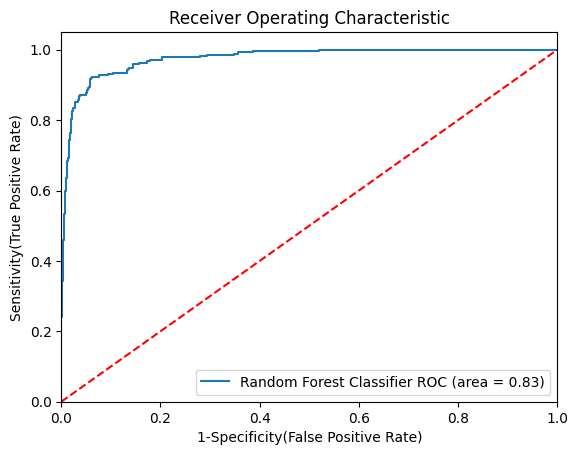

In [92]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score, roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
    {
        'label': 'Random Forest Classifier',
        'model': RandomForestClassifier(n_estimators=200, min_samples_split=2, 
                                        max_features=7, max_depth=15),
        'auc': 0.8319
    },
]

# Create loop through all models
for algo in auc_models:
    model = algo['model']  # Select the model
    model.fit(X_train, y_train)  # Train the model
    
    # Compute False Positive Rate and True Positive Rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    
    # Calculate Area Under the Curve to display on the plot
    # Calculate Area under the curve to display on the plot
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))

# Custom settings for the plot
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()